# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        # city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                        #   "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found or error occurred: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | menaka
Processing Record 2 of Set 1 | vingt cinq
City not found or error occurred: 'coord'
Processing Record 3 of Set 1 | isla vista
Processing Record 4 of Set 1 | akureyri
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | alaghsas
Processing Record 7 of Set 1 | bima
Processing Record 8 of Set 1 | canada de gomez
Processing Record 9 of Set 1 | nantucket
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | flying fish cove
Processing Record 12 of Set 1 | nova xavantina
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | fuvahmulah
City not found or error occurred: 'coord'
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | p

In [4]:
city_data

[{'City': 'menaka',
  'Lat': 15.9182,
  'Lng': 2.4022,
  'Max Temp': 27.76,
  'Humidity': 12,
  'Cloudiness': 0,
  'Wind Speed': 5.57,
  'Date': 1706375850},
 {'City': 'isla vista',
  'Lat': 34.4133,
  'Lng': -119.861,
  'Max Temp': 21.31,
  'Humidity': 52,
  'Cloudiness': 0,
  'Wind Speed': 0,
  'Date': 1706375850},
 {'City': 'akureyri',
  'Lat': 65.6835,
  'Lng': -18.0878,
  'Max Temp': -0.04,
  'Humidity': 47,
  'Cloudiness': 75,
  'Wind Speed': 6.17,
  'Date': 1706375850},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 8.16,
  'Humidity': 91,
  'Cloudiness': 90,
  'Wind Speed': 15,
  'Date': 1706375851},
 {'City': 'alaghsas',
  'Lat': 17.0187,
  'Lng': 8.0168,
  'Max Temp': 23.94,
  'Humidity': 16,
  'Cloudiness': 0,
  'Wind Speed': 9.77,
  'Date': 1706375851},
 {'City': 'bima',
  'Lat': -8.4667,
  'Lng': 118.7167,
  'Max Temp': 25.42,
  'Humidity': 92,
  'Cloudiness': 87,
  'Wind Speed': 0.78,
  'Date': 1706375851},
 {'City': 'canada de gomez',
  '

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Date          555
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,menaka,15.9182,2.4022,27.76,12,0,5.57,1706375850
1,isla vista,34.4133,-119.8610,21.31,52,0,0.00,1706375850
2,akureyri,65.6835,-18.0878,-0.04,47,75,6.17,1706375850
3,port-aux-francais,-49.3500,70.2167,8.16,91,90,15.00,1706375851
4,alaghsas,17.0187,8.0168,23.94,16,0,9.77,1706375851


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,menaka,15.9182,2.4022,27.76,12,0,5.57,1706375850
1,isla vista,34.4133,-119.8610,21.31,52,0,0.00,1706375850
2,akureyri,65.6835,-18.0878,-0.04,47,75,6.17,1706375850
3,port-aux-francais,-49.3500,70.2167,8.16,91,90,15.00,1706375851
4,alaghsas,17.0187,8.0168,23.94,16,0,9.77,1706375851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

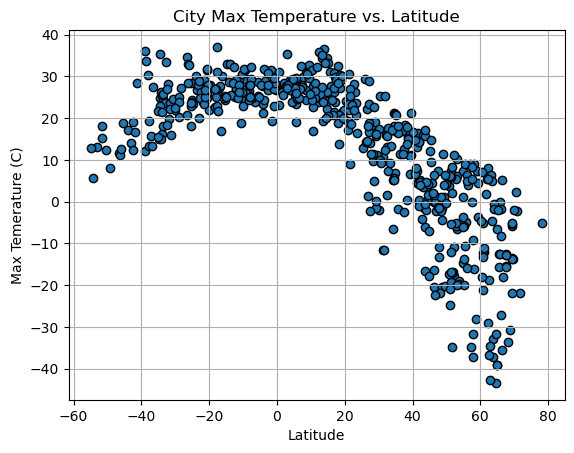

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Max Temerature (C)")
plt.xlabel("Latitude")
plt.title("City Max Temperature vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

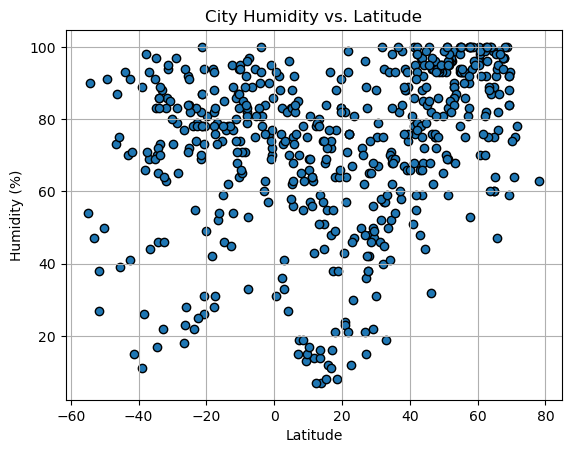

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Humidity vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

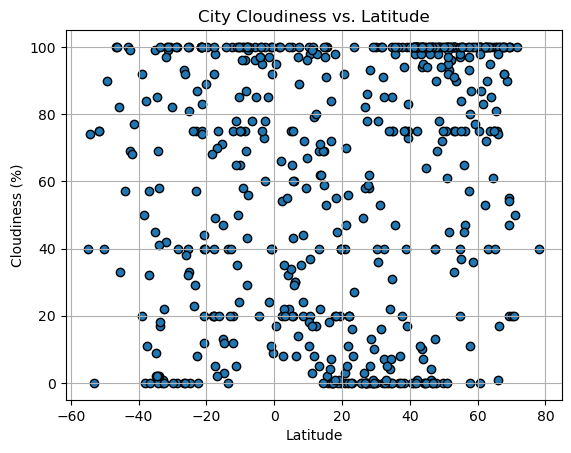

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Cloudiness vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

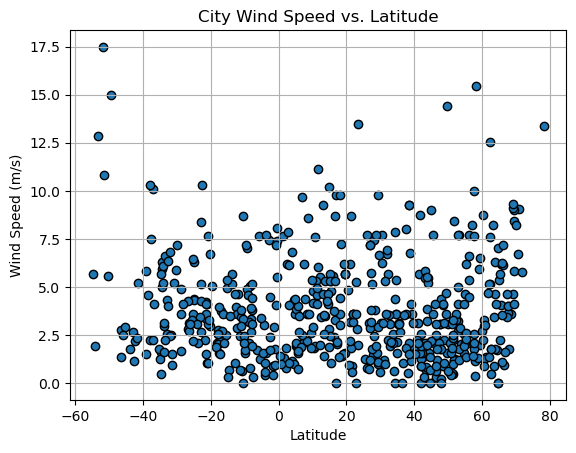

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Wind Speed vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linreg(x, y, x_value, y_value): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    regress = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, regress, color='red')
    plt.annotate(line_eq,(x_value, y_value),fontsize=15,color="red")

    
    print(f"The r-value is: {rvalue}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,menaka,15.9182,2.4022,27.76,12,0,5.57,1706375850
1,isla vista,34.4133,-119.8610,21.31,52,0,0.00,1706375850
2,akureyri,65.6835,-18.0878,-0.04,47,75,6.17,1706375850
4,alaghsas,17.0187,8.0168,23.94,16,0,9.77,1706375851
7,nantucket,41.2835,-70.0995,4.49,100,100,5.66,1706375572


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,8.16,91,90,15.00,1706375851
5,bima,-8.4667,118.7167,25.42,92,87,0.78,1706375851
6,canada de gomez,-32.8164,-61.3949,33.35,22,1,4.32,1706375851
8,grytviken,-54.2811,-36.5092,5.76,90,74,1.92,1706375852
9,flying fish cove,-10.4217,105.6791,24.82,94,100,0.00,1706375852


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8259687680636171


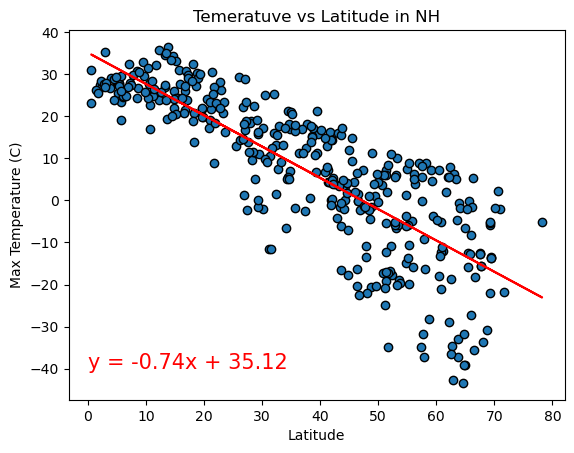

In [16]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0,-40)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Temeratuve vs Latitude in NH")
plt.show()


The r-value is: 0.5878547505122591


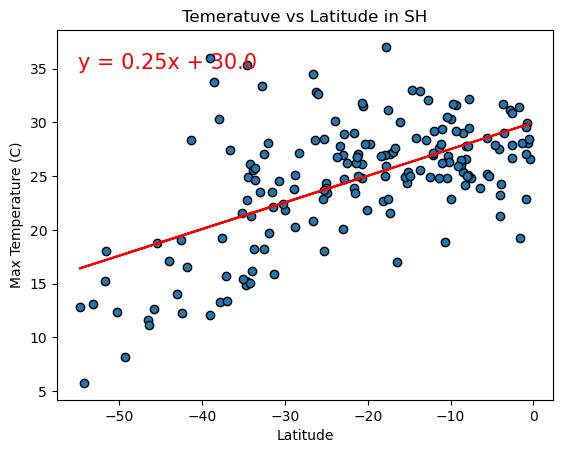

In [17]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -55, 35)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Temeratuve vs Latitude in SH")
plt.show()

**Discussion about the linear relationship:** 

In the first plot we see a high r-value of around -.82 which indicates a strong correlational relationship beteween latitude and temperature. However, the relationship is negative which means as one value increases as the other decreases. The higher the latitude the lower temperature becomes. The second plot has a r-value of .58 which indicates a moderately positive correlational relationship. It vaguely indicates as the latitude approaches 0 the temperature gets higher. Overall you can see that there is some correlational relationship between latitude and temperature, as the latitude gets closer to zero, the temperture increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5118600978758128


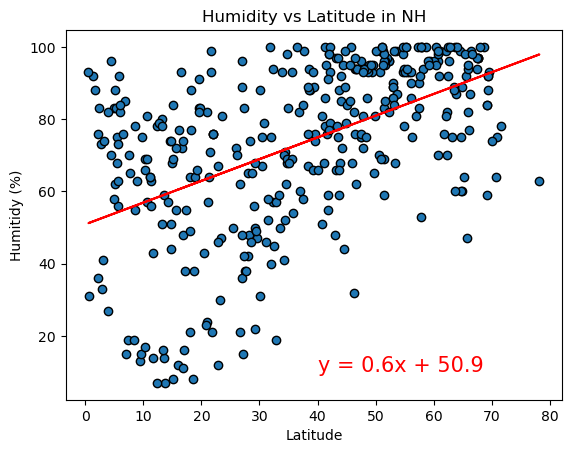

In [18]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 40,10)
plt.xlabel("Latitude")
plt.ylabel("Humitidy (%)")
plt.title("Humidity vs Latitude in NH")
plt.show()

The r-value is: 0.23462628443416975


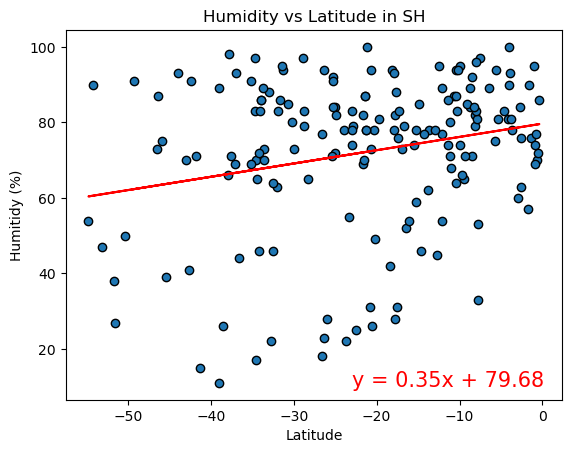

In [28]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -23,10)
plt.xlabel("Latitude")
plt.ylabel("Humitidy (%)")
plt.title("Humidity vs Latitude in SH")
plt.show()

**Discussion about the linear relationship:** 

In the first plot, there is an r-value of around 0.51 which indicates that there is a mild correlational relationship between humidity and latitude. As the latitude increases in the NH the humidity generally seems to increase as well. However, there is no concrete correlational relationship. The second plot on the other hand has an r-value of 0.23 which indicates there is a weak correlational relationship. No conclusions can be drawn from this plot. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.35774625303877816


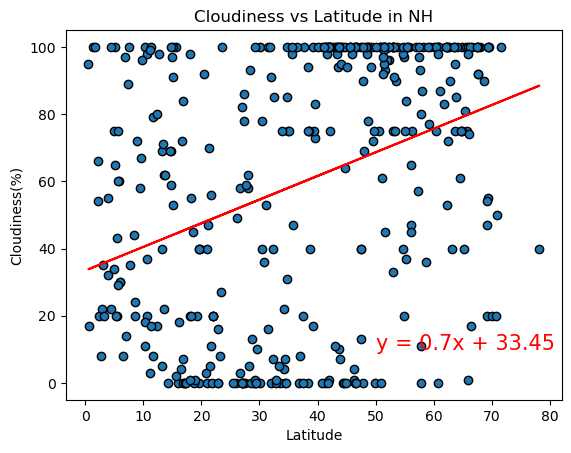

In [31]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 50,10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Cloudiness vs Latitude in NH")
plt.show()

The r-value is: 0.17145863328131947


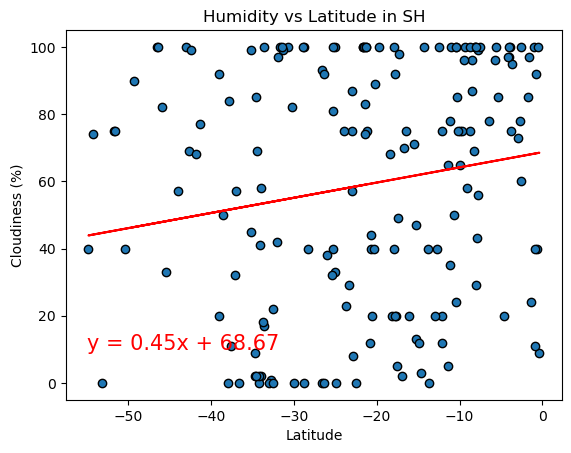

In [34]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -55,10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Humidity vs Latitude in SH")
plt.show()

**Discussion about the linear relationship:** 

In the first plot there is an r-value of 0.35 which indicates a weak correlational relationship. No conclusions can be drawn between latitude and cloudiness in the NH. The second plot has an even smaller r-value of .17 which indicates an even weaker correlational relationship. No conclusions can be drawn between these relationships. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027033781593585243


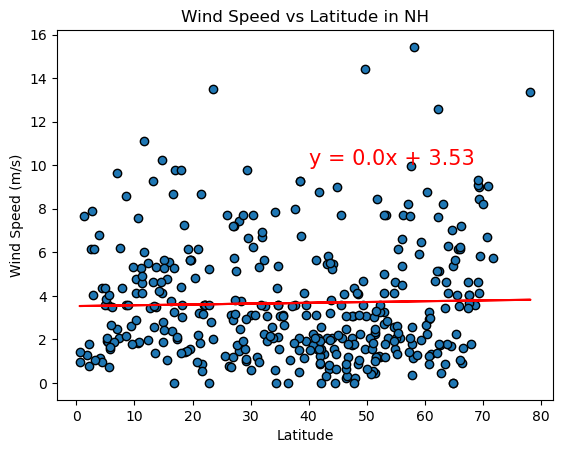

In [35]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 40,10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude in NH")
plt.show()

The r-value is: -0.26182653273523093


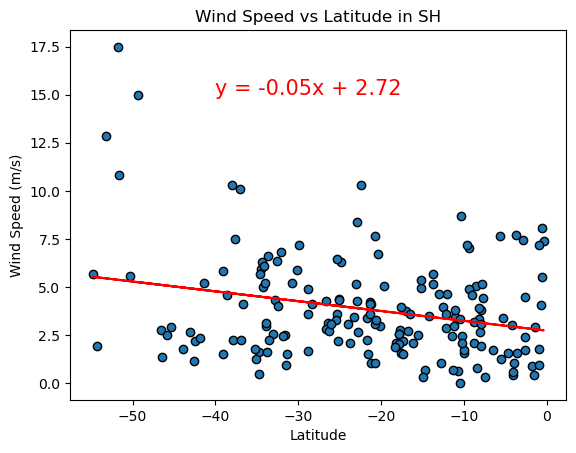

In [38]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -40, 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude in SH")
plt.show()

**Discussion about the linear relationship:** 

In the first plot there is an r-value of 0.02 which indicates no correlational relationship it all. No conclusions can be drawn between latitude and wind speed in the NH. The second plot has an r-value of -0.26  indicates a weak correlational relationship. No conclusions can be drawn between these relationships. 